In [1]:
#importing necessary libraries
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Load data and split it into train and test sets
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [3]:
#To see image shape
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
#To see first image
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
#To see label of first image
y_train[0]

5

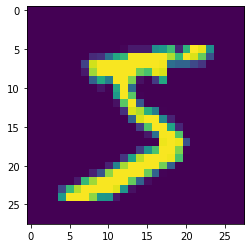

In [6]:
#To see first image as a picture
plt.imshow(X_train[0])

In [7]:
#Reshapeing the data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [8]:
#Using one-hot encoding
y_train_en = to_categorical(y_train)
y_test_en = to_categorical(y_test)

In [9]:
#Print new label
print(y_train_en[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [10]:
#Build CNN model
model = Sequential()
#Add layers
model.add(Conv2D(64,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

In [11]:
#Compiling model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
#Training model
cnn = model.fit(X_train,y_train_en,validation_data=(X_test,y_test_en),epochs=3)

Epoch 1/3
1875/1875 [==============================] - 165s 88ms/step - loss: 0.2278 - accuracy: 0.9495 - val_loss: 0.0913 - val_accuracy: 0.9725
Epoch 2/3
1875/1875 [==============================] - 165s 88ms/step - loss: 0.0697 - accuracy: 0.9793 - val_loss: 0.0829 - val_accuracy: 0.9757
Epoch 3/3
1875/1875 [==============================] - 166s 88ms/step - loss: 0.0502 - accuracy: 0.9842 - val_loss: 0.0828 - val_accuracy: 0.9769


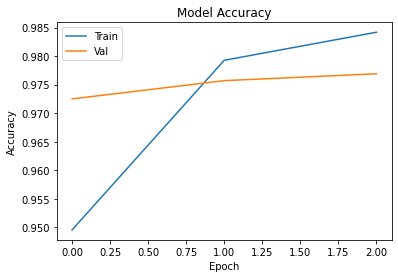

In [13]:
#Visualising models accuracy
plt.plot(cnn.history['accuracy'])
plt.plot(cnn.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Val'], loc='upper left')
plt.show()

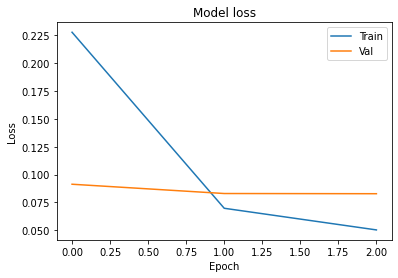

In [14]:
#Visualising models loss
plt.plot(cnn.history['loss'])
plt.plot(cnn.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

In [15]:
#Predictions as probabilities for first 5 images in test set
predictions = model.predict(X_test[:5])
predictions

array([[4.23019877e-08, 1.00297510e-13, 4.44562396e-08, 3.38448487e-08,
        1.66850668e-14, 1.03060468e-11, 3.08141544e-15, 9.99999881e-01,
        1.14208554e-08, 1.67043499e-08],
       [6.76061918e-09, 3.03715638e-07, 9.99999523e-01, 1.32838497e-11,
        3.97352859e-13, 6.55917717e-14, 1.05809356e-07, 2.60364230e-10,
        4.09335144e-08, 4.89526497e-14],
       [1.69094290e-06, 9.99610722e-01, 2.76434148e-04, 9.43545908e-10,
        9.45110742e-07, 4.55976931e-07, 1.61427386e-06, 1.68637564e-06,
        1.06443011e-04, 3.22068878e-08],
       [9.99852419e-01, 1.52321905e-10, 2.59366807e-05, 5.45266991e-11,
        4.29577121e-08, 2.61129673e-09, 1.21247220e-04, 1.06913474e-08,
        3.30576633e-08, 3.61745208e-07],
       [6.00425931e-09, 1.19488742e-11, 1.35294718e-11, 9.17746565e-13,
        9.99972224e-01, 8.23338099e-12, 1.04653794e-11, 7.20163573e-09,
        8.66475058e-10, 2.77559902e-05]], dtype=float32)

In [16]:
#Show predictions as labels for first 5 images in test set
print(np.argmax(predictions, axis=1))

#Show actual results
print(y_test[:5])

[7 2 1 0 4]
[7 2 1 0 4]


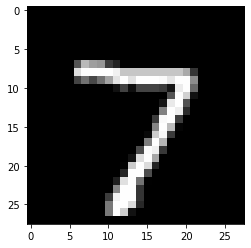

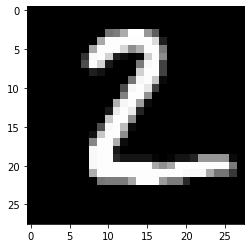

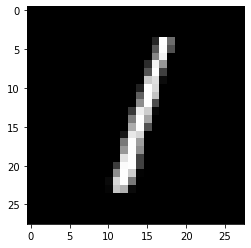

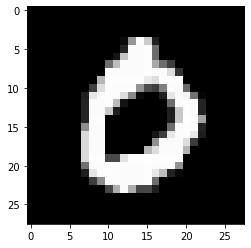

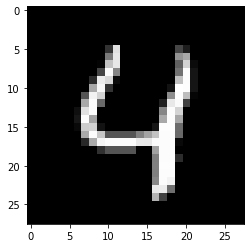

In [17]:
#Show first 5 images as pictures
for i in range(0,5):
  image = X_test[i]
  image = np.array(image, dtype='float')
  pixels = image.reshape((28,28))
  plt.imshow(pixels,cmap='gray')
  plt.show()